In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as encoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [647]:
dataset = pd.read_csv('stubbs_africahappiness.csv')
dataset.head()

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218


*   **Country Name** : Name of country
*   **Regional Indicator** : Location or Continent
*   **Happiness Scores** : The national average response to this question "How would you rate your current life on a scale from 0 to 10?"
*   **Social Support** : The national average of the binary responses to this question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
*   **Healthy Life Expectancy** : The estimate of how many years a person might live in a 'healthy' state in a certain country. (66.9 in Tunisia).
*   **Freedom to Make Life Choices** : The national average of the binary responses to this question “Are are you satisfied with your freedom to choose what you do with your life, or not?”
*   **Generosity** : The national average of the binary responses to this question “Have you donated money to a charity in the past month?”
*   **Perceptions of Corruption** : The national average of the binary responses to this question “Is corruption widespread throughout the government and businesses or not?”

*The purpose is to create a machine learing model that can predict the happiness score based on personal answers.*


In [648]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  153 non-null    object 
 1   Regional Indicator            153 non-null    object 
 2   Happiness Scores              154 non-null    float64
 3   Social Support                153 non-null    float64
 4   Healthy Life Expectancy       153 non-null    float64
 5   Freedom to Make Life Choices  153 non-null    float64
 6   Generosity                    153 non-null    float64
 7   Perceptions of Corruption     153 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.8+ KB


In [649]:
dataset = dataset.iloc[0:153,1:] #dropping rows with missing data and unimportant column
print(dataset.isnull().sum().sum())
dataset.head()

0


,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218


<BarContainer object of 153 artists>

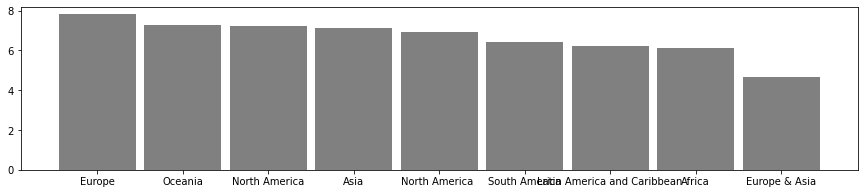

In [650]:
plt.figure(figsize=(15,3))
plt.bar(dataset['Regional Indicator'], dataset['Happiness Scores'], width=.9, color='grey')

In [651]:
dataset['Regional Indicator'] = encoder().fit_transform(dataset['Regional Indicator']) #Transforming data from categorical to numerical
dataset.head()

,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,2,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,2,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,2,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,2,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,2,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218


Text(0, 0.5, 'Happiness Scores')

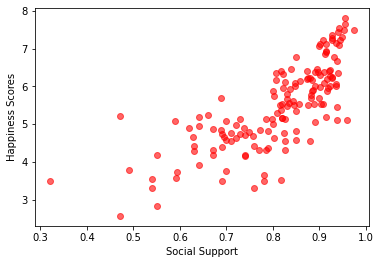

In [652]:
plt.scatter(dataset['Social Support'], dataset['Happiness Scores'], c='r', alpha=.6)
plt.xlabel('Social Support')
plt.ylabel('Happiness Scores')

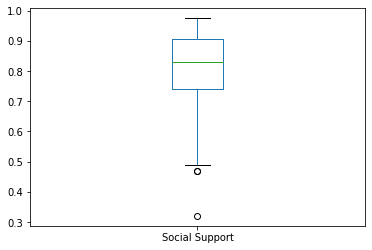

In [653]:
dataset['Social Support'].plot.box()

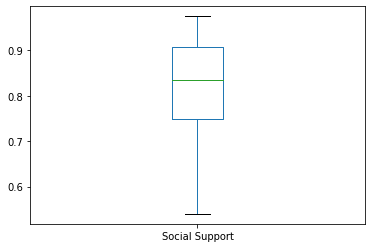

In [654]:
dataset = dataset[(dataset['Social Support'] > .5)] #Getting rid of outliers
dataset['Social Support'].plot.box()

Text(0, 0.5, 'Happiness Scores')

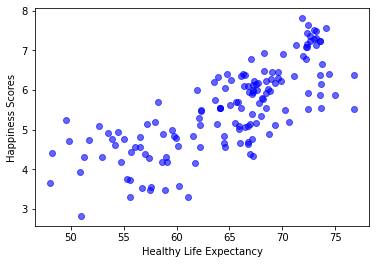

In [655]:
plt.scatter(dataset['Healthy Life Expectancy'], dataset['Happiness Scores'], c='b', alpha=.6)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Scores')

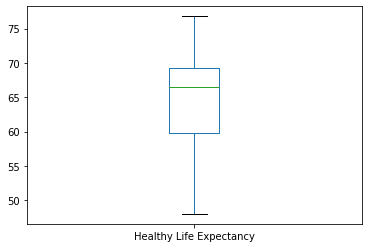

In [656]:
dataset['Healthy Life Expectancy'].plot.box()

Text(0, 0.5, 'Happiness Scores')

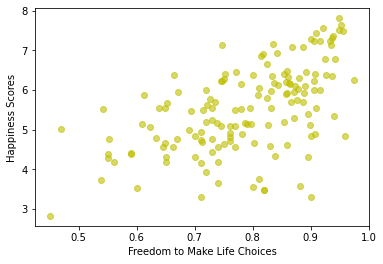

In [657]:
plt.scatter(dataset['Freedom to Make Life Choices'], dataset['Happiness Scores'], c='y', alpha=.6)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Scores')

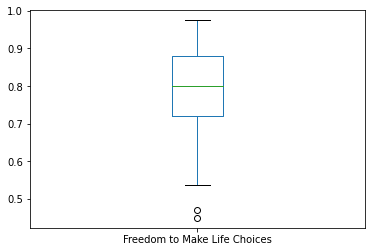

In [658]:
dataset['Freedom to Make Life Choices'].plot.box()

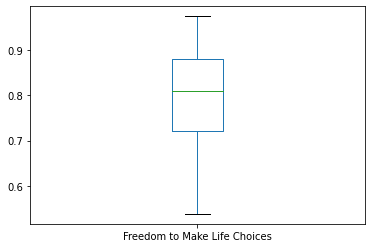

In [659]:
dataset = dataset[(dataset['Freedom to Make Life Choices'] > .5)] #Getting rid of outliers
dataset['Freedom to Make Life Choices'].plot.box()

Text(0, 0.5, 'Happiness Scores')

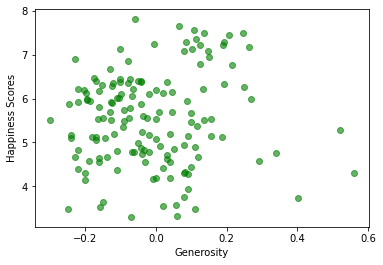

In [660]:
plt.scatter(dataset['Generosity'], dataset['Happiness Scores'], c='g', alpha=.6)
plt.xlabel('Generosity')
plt.ylabel('Happiness Scores')

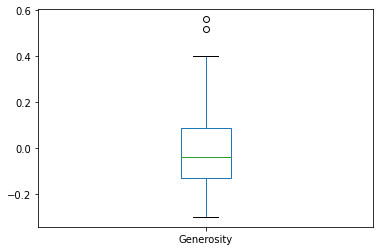

In [661]:
dataset['Generosity'].plot.box()

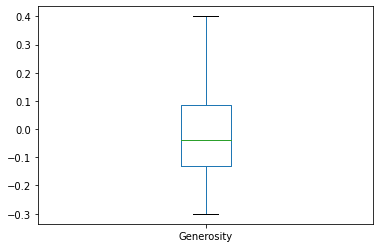

In [662]:
dataset = dataset[(dataset['Generosity'] < .5)] #Getting rid of outliers
dataset['Generosity'].plot.box()

Text(0, 0.5, 'Happiness Scores')

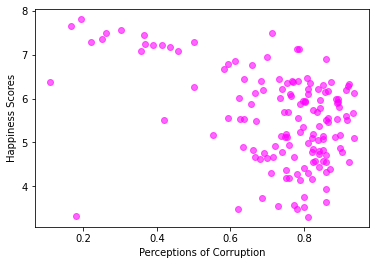

In [663]:
plt.scatter(dataset['Perceptions of Corruption'], dataset['Happiness Scores'], c='magenta', alpha=.6)
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Scores')

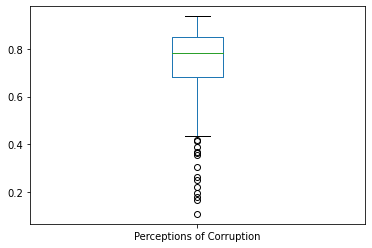

In [664]:
dataset['Perceptions of Corruption'].plot.box()

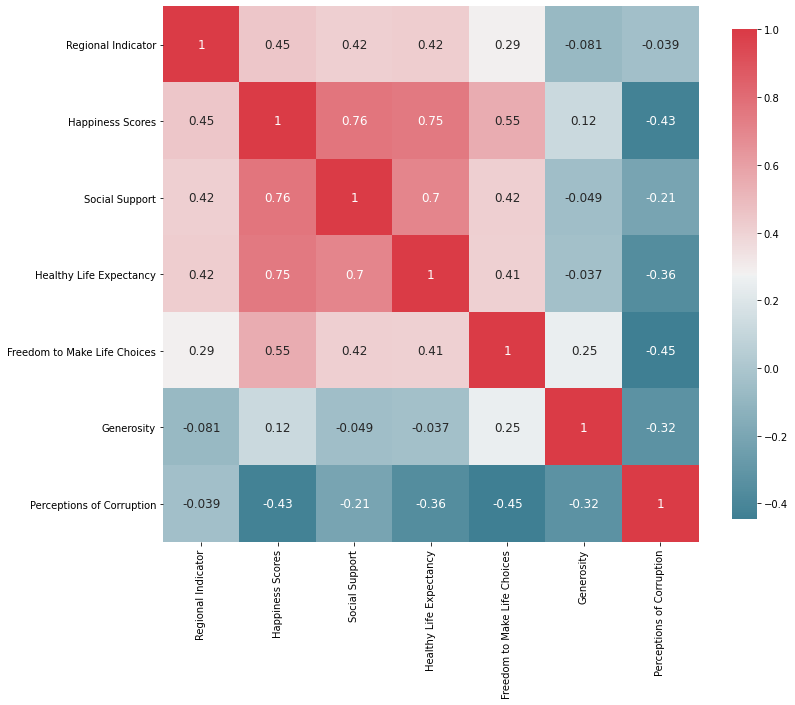

In [665]:
corr = dataset.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) ) 
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(
  corr,
  cmap = cmap,
  square=True,
  cbar_kws={ 'shrink' : .9 },
  ax=ax,
  annot = True,
  annot_kws = { 'fontsize' : 12 })

In [666]:
dataset.drop('Generosity', axis=1, inplace=True) #Feature selection
dataset.head()

,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption
0,2,7.8087,0.954330,71.900825,0.949172,0.195445
1,2,7.6456,0.955991,72.402504,0.951444,0.168489
2,2,7.5599,0.942847,74.102448,0.921337,0.303728
3,2,7.5045,0.974670,73.000000,0.948892,0.711710
4,2,7.4880,0.952487,73.200783,0.955750,0.263218


In [667]:
X = dataset.drop('Happiness Scores', axis=1).values
Y = dataset['Happiness Scores'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40) #Splitting Data

In [668]:
#Creating polynomial models with different degrees to know which one has the highest R2 value

for d in range(2, 11) :
  poly = PolynomialFeatures(degree=d)
  x_train_fit = poly.fit_transform(x_train)
  x_test_ = poly.fit_transform(x_test)
  poly_model = LinearRegression()
  poly_model.fit(x_train_fit, y_train)
  predictions = poly_model.predict(x_test_)
  print("R squared for", d, "degrees :", round(metrics.r2_score(y_test,predictions), 2))

R squared for 2 degrees : 0.81
R squared for 3 degrees : -0.36
R squared for 4 degrees : -541.3
R squared for 5 degrees : -10118.26
R squared for 6 degrees : -24851.61
R squared for 7 degrees : -33590.88
R squared for 8 degrees : -49006.51
R squared for 9 degrees : -77464.2
R squared for 10 degrees : -129694.81


In [669]:
poly = PolynomialFeatures(degree=2) #Choosing the best degree value
x_train_fit = poly.fit_transform(x_train)
x_test_ = poly.fit_transform(x_test)

poly_model = LinearRegression() #Creating the polynomial model
poly_model.fit(x_train_fit, y_train)
poly_predictions = poly_model.predict(x_test_)

poly_mse = metrics.mean_squared_error(y_test, poly_predictions)
poly_rsquared = metrics.r2_score(y_test,poly_predictions)
print("MSE: ", round(poly_mse, 2))
print("R squared: ", round(poly_rsquared, 2), '\n')

for i in range(0, 11) :
    print('happiness score:', round(y_test[i],2), '| prediction:', round(poly_predictions[i],2))


MSE:  0.19
R squared:  0.81 

happiness score: 4.19 | prediction: 4.68
happiness score: 5.2 | prediction: 6.26
happiness score: 5.89 | prediction: 6.48
happiness score: 4.43 | prediction: 4.42
happiness score: 4.83 | prediction: 4.53
happiness score: 4.68 | prediction: 5.2
happiness score: 5.75 | prediction: 5.91
happiness score: 6.0 | prediction: 5.65
happiness score: 4.37 | prediction: 3.78
happiness score: 7.22 | prediction: 7.17
happiness score: 4.89 | prediction: 5.09


In [670]:
linear_model = LinearRegression() #Creating the multilinear model
linear_model.fit(x_train,y_train)
linear_predictions = linear_model.predict(x_test)

linear_mse = metrics.mean_squared_error(y_test, linear_predictions)
linear_rsquared = metrics.r2_score(y_test,linear_predictions)
print("MSE: ", round(linear_mse, 2))
print("R squared: ", round(linear_rsquared, 2), '\n')

for i in range(0, 11) :
    print('happiness score:', round(y_test[i],2), '| prediction:', round(linear_predictions[i],2))

MSE:  0.17
R squared:  0.83 

happiness score: 4.19 | prediction: 4.73
happiness score: 5.2 | prediction: 6.18
happiness score: 5.89 | prediction: 6.16
happiness score: 4.43 | prediction: 4.57
happiness score: 4.83 | prediction: 5.17
happiness score: 4.68 | prediction: 5.21
happiness score: 5.75 | prediction: 5.76
happiness score: 6.0 | prediction: 5.94
happiness score: 4.37 | prediction: 4.58
happiness score: 7.22 | prediction: 7.16
happiness score: 4.89 | prediction: 5.09


In [671]:
ranforest_model = RandomForestRegressor(n_estimators=100)  #Creating the random forest model
ranforest_model.fit(x_train, y_train)
ranforest_predictions = ranforest_model.predict(x_test)

acc = ranforest_model.score(x_test, y_test)
print("Accuracy:", round(acc, 2), '\n')

for i in range(0, 11) :
    print('happiness score:', round(y_test[i],2), '| prediction:', round(ranforest_predictions[i],2))

Accuracy: 0.81 

happiness score: 4.19 | prediction: 5.08
happiness score: 5.2 | prediction: 6.45
happiness score: 5.89 | prediction: 6.1
happiness score: 4.43 | prediction: 4.36
happiness score: 4.83 | prediction: 5.02
happiness score: 4.68 | prediction: 4.9
happiness score: 5.75 | prediction: 5.61
happiness score: 6.0 | prediction: 5.82
happiness score: 4.37 | prediction: 4.13
happiness score: 7.22 | prediction: 7.15
happiness score: 4.89 | prediction: 3.98


In [672]:
decistree_model = DecisionTreeRegressor()  #Creating the random forest model
decistree_model.fit(x_train, y_train)
decistree_predictions = decistree_model.predict(x_test)

acc = ranforest_model.score(x_test, y_test)
print("Accuracy:", round(acc, 2))

for i in range(0, 11) :
    print('happiness score:', round(y_test[i],2), '| prediction:', round(decistree_predictions[i],2))

Accuracy: 0.81
happiness score: 4.19 | prediction: 4.83
happiness score: 5.2 | prediction: 6.36
happiness score: 5.89 | prediction: 6.14
happiness score: 4.43 | prediction: 3.65
happiness score: 4.83 | prediction: 4.67
happiness score: 4.68 | prediction: 5.14
happiness score: 5.75 | prediction: 4.88
happiness score: 6.0 | prediction: 5.54
happiness score: 4.37 | prediction: 4.29
happiness score: 7.22 | prediction: 7.45
happiness score: 4.89 | prediction: 3.31


The multi-linear regression model has the highest accuracy(R-squared value) among all the models. So the best model to predict the happiness score is the multi-linear model.

**Try the model :**

In [673]:
loc = input("What is your location ? \n (Africa/Asia/Europe/North America/South America/Oceania/Latin America and Caribbean/North America/Europe & Asia : ")
loc_lst = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania", "Latin America and Caribbean", "North America", "Europe & Asia"]
for l in range(len(loc_lst)) :
  if loc == loc_lst[l] :
    loc = l

soc_supp = input("\n If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them? \n Enter 0 for no or 1 for yes : ")
hle = input("\n What is the Healthy Life Expectancy of your country? : ")
freedom = input("\n Are you satisfied with your freedom to choose what you do with your life? \n Enter 0 for no or 1 for yes  : ")
corrup = input("\n Is corruption widespread throughout the government and businesses? \n Enter 0 for no or 1 for yes  : ")

input_data = np.array([float(loc), float(soc_supp), float(hle), float(freedom), float(corrup)])
input_data = np.reshape(input_data, (1,5))

output_pred = linear_model.predict(input_data)
print('\n The happiness score based on your answers is', round(output_pred[0], 2), '(this prediction is', round(linear_rsquared*100, 2), '% accurate)')

What is your location ? 
 (Africa/Asia/Europe/North America/South America/Oceania/Latin America and Caribbean/North America/Europe & Asia : Africa

 If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them? 
 Enter 0 for no or 1 for yes : 1

 What is the Healthy Life Expectancy of your country? : 66.9

 Are you satisfied with your freedom to choose what you do with your life? 
 Enter 0 for no or 1 for yes  : 0

 Is corruption widespread throughout the government and businesses? 
 Enter 0 for no or 1 for yes  : 1

 The happiness score based on your answers is 4.96 (this prediction is 83.5 % accurate)
